In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from flame_net.FourierOp_Nd import FourierOp_Nd
from flame_net.DeepONet_1d import DeepONet_1d
from flame_net.ConvPDE_Nd import ConvPDE_Nd
from flame_net.lib_uti import Cdata_sys, count_learnable_params, lib_Model,lib_DataGen,LpLoss,lib_ModelTrain
from timeit import default_timer

#-----------------------
device = torch.device('cuda') # if torch.cuda.is_available() else 'cpu')


#-----------------------
nDIM = 2
#data_sys = Cdata_sys('siva',[0.07])
data_sys = Cdata_sys('cfd',['L1536_rho8'])
params = lib_Model.set_default_params(data_sys,nDIM)

#--------------------------------
params['data:nStep']  = 1
params['data:nStepSkip']=1

params['T_in' ] = 1
params['T_out'] = 8
params['data_channel'] = 1
#params['data:yB_estimate']=np.array([-0.8, 2.4]) * np.pi
params['data:yB_estimate']=np.array([-0.7, 2.5]) * np.pi
params['data:AspectRatio_set'] = 1

params['Nx']            =512

#-----
params['train:batch_size'] = 5

#-----------
model_name = 'fourier'
params['fourier:modes_fourier' ] = [64,64]
params['fourier:width' ] = 20
params['fourier:depth' ] = 4
#---------------------------------------------


train_disp, test_disp, train_PDEpara, test_PDEpara = lib_DataGen.DataGen(data_sys,params)




----- params for DataGen -----
nDIM,T_in,T_out,Nx,nStep,nStepSkip,data_channel, data_sys.sysname, data_sys.list_nu, data_sys.list_cfdfilename
------------------------------
['L1536_rho8']
Ny_actual= 819 ; yB/(pi)= [-0.7         2.49921875] , AspectRatio_set= 1
...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................27.509228229522705 [s]
Done for  ./D

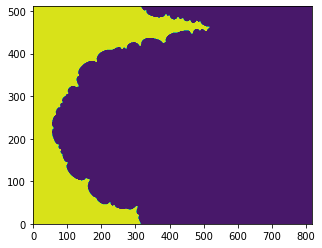

In [2]:
%matplotlib inline
plt.figure(figsize=[5,4])
plt.contourf(  train_disp[-1,:,:,-1]  )

In [3]:
model_name_detail = lib_Model.get_model_name_detail(model_name,data_sys,params)
model = lib_Model.build_model(model_name_detail,params)

Fourier2D_m64_64w20cfdL1536_rho8_share_skip
count_learnable_params= 6556877


In [4]:

lib_ModelTrain.Train(train_disp, test_disp,train_PDEpara,test_PDEpara,model,model_name_detail,device,params )


batch_size= 5
ntrain= 695  ,ntest= 1
train_l2_indentity= tensor(0.2183) ,  test_l2_indentity= tensor(0.2507)
...........................................................................................................................................
ep t[s] trainErr_norm testErr_norm train_l2 test_l2 train_l2_step test_l2_step train_rel_ind test_rel_ind 
0, 234.50, 1.000, 0.642, 0.204, 0.131, 0.202, 0.130, 0.935, 0.523
.............

KeyboardInterrupt: 